In [1]:
import magic
import hashlib
import json
import urllib2
import urllib
import sys
import os
import yara
import subprocess
import glob
import pandas as pd

#print 
class Static:

    def __init__(self, mal_file):
        self.file = mal_file
        self.md5 = ""

    def filetype(self):
        if os.path.exists(self.file):
            try:
                m = magic.open(magic.MAGIC_NONE)
                m.load()
                ftype = m.file(self.file)
                return ftype
            except AttributeError:
                ftype = magic.from_file(self.file)
                return ftype    
        else:
            print "No such file or directory:", self.file
            sys.exit()

    def get_file_size(self):
        fr = open(self.file, 'rb')
        size = len(fr.read())
        fr.close()
        return size

    
   
   

    def ascii_strings(self):
        output = subprocess.check_output(["strings", "-a", self.file])
        return output

    def unicode_strings(self):
        output = subprocess.check_output(["strings", "-a", "-el", self.file])
        return output

    def dependencies(self):
        try:
            output = subprocess.check_output(["ldd", self.file])
            return output
        except:
            pass

    def elf_header(self):
        output = subprocess.check_output(["readelf","-h",self.file])
        return output

    def program_header(self):
        output = subprocess.check_output(["readelf","-l",self.file])
        return output

    def section_header(self):
        output = subprocess.check_output(["readelf","-S",self.file])
        return output

    def symbols(self):
        output = subprocess.check_output(["readelf","-s",self.file])
        return output
    
    def reloc(self):
        output = subprocess.check_output(["readelf","-r",self.file])
        return output
    
    def dynamic_content(self):
        output = subprocess.check_output(["readelf","-d",self.file])
        return output


In [2]:
header_details=[]
programm_header_info=[]
section_header_info=[]
section_htype=[]
dynamic_stype=[]
dynamic_fname=[]
dynamic_sec_name=[]

In [4]:
path=[]
with open('/home/anmol/Documents/nameoffinalfiles/Benginname.txt','r') as file1:
    for name in file1:
        naam=name.strip('\n')
        path.append(naam)
print path    

['/home/anmol/Downloads/C_source_code/ELFFILE/2206', '/home/anmol/Downloads/C_source_code/ELFFILE/502', '/home/anmol/Downloads/C_source_code/ELFFILE/99f38ff40ce6b19ca333e7d4e3a46507eb624df470089a4161b628dd7bf2881f', '/home/anmol/Downloads/C_source_code/ELFFILE/86bdfc27071f13b70fc256686dad8b3421d35281ba30d925125d79b5f57769cc', '/home/anmol/Downloads/C_source_code/ELFFILE/1154', '/home/anmol/Downloads/C_source_code/ELFFILE/12597', '/home/anmol/Downloads/C_source_code/ELFFILE/1863', '/home/anmol/Downloads/C_source_code/ELFFILE/2396', '/home/anmol/Downloads/C_source_code/ELFFILE/512', '/home/anmol/Downloads/C_source_code/ELFFILE/711', '/home/anmol/Downloads/C_source_code/ELFFILE/6833', '/home/anmol/Downloads/C_source_code/ELFFILE/c0e5a786555cdf800fd0815b49eade8a1d2d0d74f0a116a2debe7ca60e1e69b0', '/home/anmol/Downloads/C_source_code/ELFFILE/770', '/home/anmol/Downloads/C_source_code/ELFFILE/709', '/home/anmol/Downloads/C_source_code/ELFFILE/575', '/home/anmol/Downloads/C_source_code/ELFFILE

In [5]:
header_details_0=[]
programm_header_info_0=[]
section_header_info_0=[]
section_htype_0=[]
dynamic_stype_0=[]
dynamic_fname_0=[]
dynamic_sec_name_0=[]
#path=glob.glob('/home/anmol/Downloads/linux_Clean/*')
num=0
for clean in path:
        static = Static(clean)
        
        filetype = static.filetype()
        '''
        try:
            if is_elf_file:
                elf_header = static.elf_header()
        except:
            print 'hello'
            continue
        '''
        num=num+1
        print num
        if num==1500:
            break
        is_elf_file = True
        dash_lines='--------------------#######################------------------------'
        #print "Filetype: %s" % filetype
        final_report='/home/anmol/final_report.txt'


        file_size = static.get_file_size()
        #print "File Size: %0.2f KB (%s bytes)" % (file_size/1024.0, file_size)
        feature={}

        ##########################regex###########################
        header_info= " Entry point address|  Start of program headers|  Start of section headers|  Size of this header|  Size of program headers|  Number of program headers| Size of section headers|  Number of section headers|  Section header string table index"
        programm_header_type="NULL|LOAD|DYNAMIC|INTERP|NOTE|SHLIB|PHDR|LOOS|HIOS|LOPROC|HIPROC"
        section_header_type="NULL|PROGBITS|SYMTAB|STRTAB|RELA|HASH|DYNAMIC|NOTE|NOBITS|REL|SHLIB|DYNSYM|LOPROC|HIPROC|LOUSER|HIUSER"
        sections=".text|.bss|.comment|.data|.data1|.debug|.dynamic|.dynstr|.dynsym|.fini|.hash|.init|.got|.interp|.line|.note|.plt|.rodata|.rodata1|.shstrtab|.strtab|.symtab|.sdata|.sbss|.lit8|.gptab|.conflict|.tdesc|.lit4|.reginfo|.liblist|.rel.dyn|.rel.plt|.got.plt"
        dyna_st_bind="LOCAL|GLOBAL|WEAK|LOOS|HIOS|LOPROC|HIPROC"
        dyna_st_type="NOTYPE|OBJECT|FUNC|SECTION|FILE|COMMON|SPARC_REGISTER|TLS|LOOS|HIOS|LOPROC|HIPROC"
        dyna_name="NULL|NEEDED|PLTRELSZ|PLTGOT|HASH|STRTAB|SYMTAB|RELA|RELASZ|RELAENT|STRSZ|SYMENT|INIT|FINI|SONAME|RPATH|SYMBOLIC|REL|RELSZ|RELENT|PLTREL|DEBUG|TEXTREL|JMPREL|POSFLAG_1|BIND_NOW|INIT_ARRAY|FINI_ARRAY|INIT_ARRAYSZ|FINI_ARRAYSZ|RUNPATH|FLAGS|ENCODING|PREINIT_ARRAY|PREINIT_ARRAYSZ|MAXPOSTAGS|SUNW_AUXILIARY|SUNW_RTLDINF|SUNW_FILTER|SUNW_CAP|SUNW_SYMTAB|SUNW_SYMSZ|SUNW_ENCODING|SUNW_SORTENT|SUNW_SYMSORT|SUNW_SYMSORTSZ|SUNW_TLSSORT|SUNW_TLSSORTSZ|SUNW_CAPINFO|SUNW_STRPAD|SUNW_CAPCHAIN|SUNW_LDMACH|SUNW_CAPCHAINENT|SUNW_CAPCHAINSZ|SYMINFO|SYMINENT|SYMINSZ|VERDEF|VERDEFNUM|VERNEED|VERNEEDNUM|RELACOUNT|RELCOUNT|AUXILIARY|FILTER|CHECKSUM|MOVEENT|MOVESZ|MOVETAB|CONFIG|DEPAUDIT|AUDIT|FLAGS_1|SPARC_REGISTER"
        reloc_type="R_386_NONE|R_386_32|R_386_PC32|R_386_GOT32|R_386_PLT32|R_386_COPY|R_386_GLOB_DAT|R_386_JUMP_SLOT|R_386_RELATIVE|R_386_GOTOFF|R_386_GOTPC|R_386_32PLT|R_386_16|R_386_PC16|R_386_8|R_386_PC8|R_386_SIZE32"

        #######################elf header##############################
        h_i={}
        if is_elf_file:
            elf_header = static.elf_header()
            f = open(final_report, 'w')
            f.write(elf_header)
            f.close()
            with open(final_report,'r') as file1:
                for line in file1 :
                     if line.split(':')[0] in header_info:
                             h_i[line.split(':')[0]]=int(line.split(':')[1].split()[0])
            #print h_i
            #print elf_header
        #print dash_lines  

        ##################dependencies###########################
        if is_elf_file:
            depends = static.dependencies()

          ##################programm header########################  
            p_h={}
            prog_header = static.program_header()

            print "Program Header Information:"

            f = open(final_report, 'w')
            f.write(prog_header)
            f.close()

            with open(final_report,'r') as file:
                for line in file :
                      if len(line.split())>1:

                            if  line.split()[0] in programm_header_type:

                                p_h[line.split()[0]]=1 





            #print p_h
            #print prog_header
            #print dash_lines

           ####################section header#####################
            s_h={}
            s_h_type={}
            sect_header = static.section_header()

            print "Section Header Information:"
            f = open(final_report, 'w')
            f.write(sect_header)
            f.close()


            with open(final_report,'r') as file:
                for line in file :
                      if len(line.split())>2:

                            if  line.split()[1] in sections:
                                s_h[line.split()[1]]=1 
                            if  line.split()[2] in section_header_type and len(line.split()[2])>2:
                                s_h_type[line.split()[2]]=1

            #print s_h
            #print s_h_type
            #print sect_header
            #print dash_lines

           #################symbol table#########################
            syms = static.symbols()
            dynS_type={}
            dynF_name={}

            #print "Symbol Information:"
            f = open(final_report, 'w')
            f.write(syms)
            f.close()

            with open(final_report,'r') as file:
                flag=0
                for line in file :
                      #print line.split()

                      if len(line.split())>3 and line.split()[0]=='Symbol'and line.split()[2]=="'.dynsym'":
                            count=int(line.split()[4])
                            dynS_type['dynamic_s_c']=count
                            flag=1
                             #print count
                      if flag==1 and len(line.split())>3:
                            if line.split()[3] in  dyna_st_type:
                                dynS_type['STT_'+line.split()[3]]=1
                                if line.split()[3]=='FUNC':
                                    x=line.split()[7]
                                    dynF_name[x[:x.find('@')]]=1

                                if line.split()[4] in dyna_st_bind:
                                    dynS_type['STB_'+line.split()[4]]=1
                                    dynS_type['STT_'+line.split()[3]+'_STB_'+line.split()[4]]=1
                      if flag==1 and len(line.split())==0:
                            flag=0
                      if len(line.split())>3 and line.split()[0]=='Symbol'and line.split()[2]=="'.symtab'":
                            count=int(line.split()[4])
                            dynS_type['toatl_s_c']=count
                            break

            #print dynS_type
            #print dynF_name
             #print syms
            #print dash_lines
            ##################relocation section######################
            reloc=static.reloc()
            r_type={}
            print 'reloc info'

            f = open(final_report, 'w')
            f.write(reloc)
            f.close()

            with open(final_report,'r') as file:
                for line in file :
                    if len(line.split())>2 :

                        if line.split()[2] in reloc_type:
                                r_type[line.split()[2]]=1
            #print r_type
            #print reloc
            #print dash_lines
            ##################dynamic section######################
            dynamic=static.dynamic_content()
            dynamic_name={}

            #print 'dynamic_content'
            f = open(final_report, 'w')
            f.write(dynamic)
            f.close()
            count=0
            with open(final_report,'r') as file:

                for line in file :
                      if len(line.split())>1:
                              x=line.split()[1]
                              x=x[1:len(x)-1]

                              if x in dyna_name:
                                  dynamic_name['DYN'+x]=1
                                  count+=1
            dynamic_name['DYNCOUNT']=count
            #print dynamic_name
            #print dynamic
            #print dash_lines
            
            ###################appendtolist#############################
            header_details.append(h_i)
            programm_header_info.append(p_h)
            section_header_info.append(s_h)
            section_htype.append(s_h_type)
            dynamic_stype.append(dynS_type)
            dynamic_fname.append(dynF_name)
            dynamic_sec_name.append(dynamic_name)
            ####################
            header_details_0.append(h_i)
            programm_header_info_0.append(p_h)
            section_header_info_0.append(s_h)
            section_htype_0.append(s_h_type)
            dynamic_stype_0.append(dynS_type)
            dynamic_fname_0.append(dynF_name)
            dynamic_sec_name_0.append(dynamic_name)
    

1
Program Header Information:
Section Header Information:
reloc info
2
Program Header Information:
Section Header Information:
reloc info
3
Program Header Information:
Section Header Information:
reloc info
4
Program Header Information:
Section Header Information:
reloc info
5
Program Header Information:
Section Header Information:
reloc info
6
Program Header Information:
Section Header Information:
reloc info
7
Program Header Information:
Section Header Information:
reloc info
8
Program Header Information:
Section Header Information:
reloc info
9
Program Header Information:
Section Header Information:
reloc info
10
Program Header Information:
Section Header Information:
reloc info
11
Program Header Information:
Section Header Information:
reloc info
12
Program Header Information:
Section Header Information:
reloc info
13
Program Header Information:
Section Header Information:
reloc info
14
Program Header Information:
Section Header Information:
reloc info
15
Program Header Information

Program Header Information:
Section Header Information:
reloc info
119
Program Header Information:
Section Header Information:
reloc info
120
Program Header Information:
Section Header Information:
reloc info
121
Program Header Information:
Section Header Information:
reloc info
122
Program Header Information:
Section Header Information:
reloc info
123
Program Header Information:
Section Header Information:
reloc info
124
Program Header Information:
Section Header Information:
reloc info
125
Program Header Information:
Section Header Information:
reloc info
126
Program Header Information:
Section Header Information:
reloc info
127
Program Header Information:
Section Header Information:
reloc info
128
Program Header Information:
Section Header Information:
reloc info
129
Program Header Information:
Section Header Information:
reloc info
130
Program Header Information:
Section Header Information:
reloc info
131
Program Header Information:
Section Header Information:
reloc info
132
Progra

Program Header Information:
Section Header Information:
reloc info
238
Program Header Information:
Section Header Information:
reloc info
239
Program Header Information:
Section Header Information:
reloc info
240
Program Header Information:
Section Header Information:
reloc info
241
Program Header Information:
Section Header Information:
reloc info
242
Program Header Information:
Section Header Information:
reloc info
243
Program Header Information:
Section Header Information:
reloc info
244
Program Header Information:
Section Header Information:
reloc info
245
Program Header Information:
Section Header Information:
reloc info
246
Program Header Information:
Section Header Information:
reloc info
247
Program Header Information:
Section Header Information:
reloc info
248
Program Header Information:
Section Header Information:
reloc info
249
Program Header Information:
Section Header Information:
reloc info
250
Program Header Information:
Section Header Information:
reloc info
251
Progra

Section Header Information:
reloc info
358
Program Header Information:
Section Header Information:
reloc info
359
Program Header Information:
Section Header Information:
reloc info
360
Program Header Information:
Section Header Information:
reloc info
361
Program Header Information:
Section Header Information:
reloc info
362
Program Header Information:
Section Header Information:
reloc info
363
Program Header Information:
Section Header Information:
reloc info
364
Program Header Information:
Section Header Information:
reloc info
365
Program Header Information:
Section Header Information:
reloc info
366
Program Header Information:
Section Header Information:
reloc info
367
Program Header Information:
Section Header Information:
reloc info
368
Program Header Information:
Section Header Information:
reloc info
369
Program Header Information:
Section Header Information:
reloc info
370
Program Header Information:
Section Header Information:
reloc info
371
Program Header Information:
Sectio

Program Header Information:
Section Header Information:
reloc info
475
Program Header Information:
Section Header Information:
reloc info
476
Program Header Information:
Section Header Information:
reloc info
477
Program Header Information:
Section Header Information:
reloc info
478
Program Header Information:
Section Header Information:
reloc info
479
Program Header Information:
Section Header Information:
reloc info
480
Program Header Information:
Section Header Information:
reloc info
481
Program Header Information:
Section Header Information:
reloc info
482
Program Header Information:
Section Header Information:
reloc info
483
Program Header Information:
Section Header Information:
reloc info
484
Program Header Information:
Section Header Information:
reloc info
485
Program Header Information:
Section Header Information:
reloc info
486
Program Header Information:
Section Header Information:
reloc info
487
Program Header Information:
Section Header Information:
reloc info
488
Progra

reloc info
591
Program Header Information:
Section Header Information:
reloc info
592
Program Header Information:
Section Header Information:
reloc info
593
Program Header Information:
Section Header Information:
reloc info
594
Program Header Information:
Section Header Information:
reloc info
595
Program Header Information:
Section Header Information:
reloc info
596
Program Header Information:
Section Header Information:
reloc info
597
Program Header Information:
Section Header Information:
reloc info
598
Program Header Information:
Section Header Information:
reloc info
599
Program Header Information:
Section Header Information:
reloc info
600
Program Header Information:
Section Header Information:
reloc info
601
Program Header Information:
Section Header Information:
reloc info
602
Program Header Information:
Section Header Information:
reloc info
603
Program Header Information:
Section Header Information:
reloc info
604
Program Header Information:
Section Header Information:
reloc 

reloc info
707
Program Header Information:
Section Header Information:
reloc info
708
Program Header Information:
Section Header Information:
reloc info
709
Program Header Information:
Section Header Information:
reloc info
710
Program Header Information:
Section Header Information:
reloc info
711
Program Header Information:
Section Header Information:
reloc info
712
Program Header Information:
Section Header Information:
reloc info
713
Program Header Information:
Section Header Information:
reloc info
714
Program Header Information:
Section Header Information:
reloc info
715
Program Header Information:
Section Header Information:
reloc info
716
Program Header Information:
Section Header Information:
reloc info
717
Program Header Information:
Section Header Information:
reloc info
718
Program Header Information:
Section Header Information:
reloc info
719
Program Header Information:
Section Header Information:
reloc info
720
Program Header Information:
Section Header Information:
reloc 

reloc info
824
Program Header Information:
Section Header Information:
reloc info
825
Program Header Information:
Section Header Information:
reloc info
826
Program Header Information:
Section Header Information:
reloc info
827
Program Header Information:
Section Header Information:
reloc info
828
Program Header Information:
Section Header Information:
reloc info
829
Program Header Information:
Section Header Information:
reloc info
830
Program Header Information:
Section Header Information:
reloc info
831
Program Header Information:
Section Header Information:
reloc info
832
Program Header Information:
Section Header Information:
reloc info
833
Program Header Information:
Section Header Information:
reloc info
834
Program Header Information:
Section Header Information:
reloc info
835
Program Header Information:
Section Header Information:
reloc info
836
Program Header Information:
Section Header Information:
reloc info
837
Program Header Information:
Section Header Information:
reloc 

reloc info
942
Program Header Information:
Section Header Information:
reloc info
943
Program Header Information:
Section Header Information:
reloc info
944
Program Header Information:
Section Header Information:
reloc info
945
Program Header Information:
Section Header Information:
reloc info
946
Program Header Information:
Section Header Information:
reloc info
947
Program Header Information:
Section Header Information:
reloc info
948
Program Header Information:
Section Header Information:
reloc info
949
Program Header Information:
Section Header Information:
reloc info
950
Program Header Information:
Section Header Information:
reloc info
951
Program Header Information:
Section Header Information:
reloc info
952
Program Header Information:
Section Header Information:
reloc info
953
Program Header Information:
Section Header Information:
reloc info
954
Program Header Information:
Section Header Information:
reloc info
955
Program Header Information:
Section Header Information:
reloc 

Section Header Information:
reloc info
1059
Program Header Information:
Section Header Information:
reloc info
1060
Program Header Information:
Section Header Information:
reloc info
1061
Program Header Information:
Section Header Information:
reloc info
1062
Program Header Information:
Section Header Information:
reloc info
1063
Program Header Information:
Section Header Information:
reloc info
1064
Program Header Information:
Section Header Information:
reloc info
1065
Program Header Information:
Section Header Information:
reloc info
1066
Program Header Information:
Section Header Information:
reloc info
1067
Program Header Information:
Section Header Information:
reloc info
1068
Program Header Information:
Section Header Information:
reloc info
1069
Program Header Information:
Section Header Information:
reloc info
1070
Program Header Information:
Section Header Information:
reloc info
1071
Program Header Information:
Section Header Information:
reloc info
1072
Program Header Infor

Program Header Information:
Section Header Information:
reloc info
1174
Program Header Information:
Section Header Information:
reloc info
1175
Program Header Information:
Section Header Information:
reloc info
1176
Program Header Information:
Section Header Information:
reloc info
1177
Program Header Information:
Section Header Information:
reloc info
1178
Program Header Information:
Section Header Information:
reloc info
1179
Program Header Information:
Section Header Information:
reloc info
1180
Program Header Information:
Section Header Information:
reloc info
1181
Program Header Information:
Section Header Information:
reloc info
1182
Program Header Information:
Section Header Information:
reloc info
1183
Program Header Information:
Section Header Information:
reloc info
1184
Program Header Information:
Section Header Information:
reloc info
1185
Program Header Information:
Section Header Information:
reloc info
1186
Program Header Information:
Section Header Information:
reloc in

reloc info
1289
Program Header Information:
Section Header Information:
reloc info
1290
Program Header Information:
Section Header Information:
reloc info
1291
Program Header Information:
Section Header Information:
reloc info
1292
Program Header Information:
Section Header Information:
reloc info
1293
Program Header Information:
Section Header Information:
reloc info
1294
Program Header Information:
Section Header Information:
reloc info
1295
Program Header Information:
Section Header Information:
reloc info
1296
Program Header Information:
Section Header Information:
reloc info
1297
Program Header Information:
Section Header Information:
reloc info
1298
Program Header Information:
Section Header Information:
reloc info
1299
Program Header Information:
Section Header Information:
reloc info
1300
Program Header Information:
Section Header Information:
reloc info
1301
Program Header Information:
Section Header Information:
reloc info
1302
Program Header Information:
Section Header Infor

Section Header Information:
reloc info
1404
Program Header Information:
Section Header Information:
reloc info
1405
Program Header Information:
Section Header Information:
reloc info
1406
Program Header Information:
Section Header Information:
reloc info
1407
Program Header Information:
Section Header Information:
reloc info
1408
Program Header Information:
Section Header Information:
reloc info
1409
Program Header Information:
Section Header Information:
reloc info
1410
Program Header Information:
Section Header Information:
reloc info
1411
Program Header Information:
Section Header Information:
reloc info
1412
Program Header Information:
Section Header Information:
reloc info
1413
Program Header Information:
Section Header Information:
reloc info
1414
Program Header Information:
Section Header Information:
reloc info
1415
Program Header Information:
Section Header Information:
reloc info
1416
Program Header Information:
Section Header Information:
reloc info
1417
Program Header Infor

In [6]:
print header_details

[{'  Number of section headers': 31, '  Size of this header': 64, '  Number of program headers': 9, '  Start of section headers': 6616, '  Start of program headers': 64, '  Section header string table index': 28, '  Size of program headers': 56}, {'  Number of section headers': 31, '  Size of this header': 64, '  Number of program headers': 9, '  Start of section headers': 6912, '  Start of program headers': 64, '  Section header string table index': 28, '  Size of program headers': 56}, {'  Number of section headers': 31, '  Size of this header': 52, '  Number of program headers': 9, '  Start of section headers': 6260, '  Start of program headers': 52, '  Section header string table index': 30, '  Size of program headers': 32}, {'  Number of section headers': 29, '  Size of this header': 52, '  Number of program headers': 9, '  Start of section headers': 893084, '  Start of program headers': 52, '  Section header string table index': 28, '  Size of program headers': 32}, {'  Number of

In [7]:
df= pd.DataFrame.from_records(header_details).fillna(0)
print df

        Number of program headers    Number of section headers  \
0                               9                           31   
1                               9                           31   
2                               9                           31   
3                               9                           29   
4                               9                           31   
5                               9                           31   
6                               9                           31   
7                               9                           31   
8                               9                           31   
9                               9                           31   
10                              9                           31   
11                              9                           30   
12                              9                           31   
13                              9                           31   
14        

In [1]:
header_details_1=[]
programm_header_info_1=[]
section_header_info_1=[]
section_htype_1=[]
dynamic_stype_1=[]
dynamic_fname_1=[]
dynamic_sec_name_1=[]
mal=open('/home/anmol/Documents/nameoffinalfiles/malwarefilename.txt','r')
#for path, subdirs, files in os.walk(root):
#    for name in files:
#        print os.path.join(path, name)
num=0
term=0
for filename in mal:
        
        print 'hello'+filename.strip('\n')+'_234'
        try :
            static = Static(str(filename).strip('\n'))
        
            
            filetype = static.filetype()
           
        except Exception as e:
            print e
            continue
        
        
        is_elf_file = True
        try:
            if is_elf_file:
                elf_header = static.elf_header()
        except Exception as e:
            print e
            continue
        
        num=num+1
        print num
        if num==1500:
            break
        
        dash_lines='--------------------#######################------------------------'
        #print "Filetype: %s" % filetype
        final_report='/home/anmol/final_report.txt'


        file_size = static.get_file_size()
        #print "File Size: %0.2f KB (%s bytes)" % (file_size/1024.0, file_size)
        feature={}

        ##########################regex###########################
        header_info= " Entry point address|  Start of program headers|  Start of section headers|  Size of this header|  Size of program headers|  Number of program headers| Size of section headers|  Number of section headers|  Section header string table index"
        programm_header_type="NULL|LOAD|DYNAMIC|INTERP|NOTE|SHLIB|PHDR|LOOS|HIOS|LOPROC|HIPROC"
        section_header_type="NULL|PROGBITS|SYMTAB|STRTAB|RELA|HASH|DYNAMIC|NOTE|NOBITS|REL|SHLIB|DYNSYM|LOPROC|HIPROC|LOUSER|HIUSER"
        sections=".text|.bss|.comment|.data|.data1|.debug|.dynamic|.dynstr|.dynsym|.fini|.hash|.init|.got|.interp|.line|.note|.plt|.rodata|.rodata1|.shstrtab|.strtab|.symtab|.sdata|.sbss|.lit8|.gptab|.conflict|.tdesc|.lit4|.reginfo|.liblist|.rel.dyn|.rel.plt|.got.plt"
        dyna_st_bind="LOCAL|GLOBAL|WEAK|LOOS|HIOS|LOPROC|HIPROC"
        dyna_st_type="NOTYPE|OBJECT|FUNC|SECTION|FILE|COMMON|SPARC_REGISTER|TLS|LOOS|HIOS|LOPROC|HIPROC"
        dyna_name="NULL|NEEDED|PLTRELSZ|PLTGOT|HASH|STRTAB|SYMTAB|RELA|RELASZ|RELAENT|STRSZ|SYMENT|INIT|FINI|SONAME|RPATH|SYMBOLIC|REL|RELSZ|RELENT|PLTREL|DEBUG|TEXTREL|JMPREL|POSFLAG_1|BIND_NOW|INIT_ARRAY|FINI_ARRAY|INIT_ARRAYSZ|FINI_ARRAYSZ|RUNPATH|FLAGS|ENCODING|PREINIT_ARRAY|PREINIT_ARRAYSZ|MAXPOSTAGS|SUNW_AUXILIARY|SUNW_RTLDINF|SUNW_FILTER|SUNW_CAP|SUNW_SYMTAB|SUNW_SYMSZ|SUNW_ENCODING|SUNW_SORTENT|SUNW_SYMSORT|SUNW_SYMSORTSZ|SUNW_TLSSORT|SUNW_TLSSORTSZ|SUNW_CAPINFO|SUNW_STRPAD|SUNW_CAPCHAIN|SUNW_LDMACH|SUNW_CAPCHAINENT|SUNW_CAPCHAINSZ|SYMINFO|SYMINENT|SYMINSZ|VERDEF|VERDEFNUM|VERNEED|VERNEEDNUM|RELACOUNT|RELCOUNT|AUXILIARY|FILTER|CHECKSUM|MOVEENT|MOVESZ|MOVETAB|CONFIG|DEPAUDIT|AUDIT|FLAGS_1|SPARC_REGISTER"
        reloc_type="R_386_NONE|R_386_32|R_386_PC32|R_386_GOT32|R_386_PLT32|R_386_COPY|R_386_GLOB_DAT|R_386_JUMP_SLOT|R_386_RELATIVE|R_386_GOTOFF|R_386_GOTPC|R_386_32PLT|R_386_16|R_386_PC16|R_386_8|R_386_PC8|R_386_SIZE32"

        #######################elf header##############################
        h_i={}
        if is_elf_file:
            elf_header = static.elf_header()
            f = open(final_report, 'w')
            f.write(elf_header)
            f.close()
            with open(final_report,'r') as file1:
                for line in file1 :
                     if line.split(':')[0] in header_info:
                             h_i[line.split(':')[0]]=int(line.split(':')[1].split()[0])
            #print h_i
            #print elf_header
        #print dash_lines  

        ##################dependencies###########################
        if is_elf_file:
            depends = static.dependencies()

          ##################programm header########################  
            p_h={}
            prog_header = static.program_header()

            print "Program Header Information:"

            f = open(final_report, 'w')
            f.write(prog_header)
            f.close()

            with open(final_report,'r') as file:
                for line in file :
                      if len(line.split())>1:

                            if  line.split()[0] in programm_header_type:

                                p_h[line.split()[0]]=1 





            #print p_h
            #print prog_header
            #print dash_lines

           ####################section header#####################
            s_h={}
            s_h_type={}
            sect_header = static.section_header()

            print "Section Header Information:"
            f = open(final_report, 'w')
            f.write(sect_header)
            f.close()


            with open(final_report,'r') as file:
                for line in file :
                      if len(line.split())>2:

                            if  line.split()[1] in sections:
                                s_h[line.split()[1]]=1 
                            if  line.split()[2] in section_header_type and len(line.split()[2])>2:
                                s_h_type[line.split()[2]]=1

            #print s_h
            #print s_h_type
            #print sect_header
            #print dash_lines

           #################symbol table#########################
            syms = static.symbols()
            dynS_type={}
            dynF_name={}

            #print "Symbol Information:"
            f = open(final_report, 'w')
            f.write(syms)
            f.close()

            with open(final_report,'r') as file:
                flag=0
                for line in file :
                      #print line.split()

                      if len(line.split())>3 and line.split()[0]=='Symbol'and line.split()[2]=="'.dynsym'":
                            count=int(line.split()[4])
                            dynS_type['dynamic_s_c']=count
                            flag=1
                             #print count
                      if flag==1 and len(line.split())>3:
                            if line.split()[3] in  dyna_st_type:
                                dynS_type['STT_'+line.split()[3]]=1
                                if line.split()[3]=='FUNC':
                                    x=line.split()[7]
                                    dynF_name[x[:x.find('@')]]=1

                                if line.split()[4] in dyna_st_bind:
                                    dynS_type['STB_'+line.split()[4]]=1
                                    dynS_type['STT_'+line.split()[3]+'_STB_'+line.split()[4]]=1
                      if flag==1 and len(line.split())==0:
                            flag=0
                      if len(line.split())>3 and line.split()[0]=='Symbol'and line.split()[2]=="'.symtab'":
                            count=int(line.split()[4])
                            dynS_type['toatl_s_c']=count
                            break

            #print dynS_type
            #print dynF_name
             #print syms
            #print dash_lines
            ##################relocation section######################
            reloc=static.reloc()
            r_type={}
            #print 'reloc info'

            f = open(final_report, 'w')
            f.write(reloc)
            f.close()

            with open(final_report,'r') as file:
                for line in file :
                    if len(line.split())>2 :

                        if line.split()[2] in reloc_type:
                                r_type[line.split()[2]]=1
            #print r_type
            #print reloc
            #print dash_lines
            ##################dynamic section######################
            dynamic=static.dynamic_content()
            dynamic_name={}

            #print 'dynamic_content'
            f = open(final_report, 'w')
            f.write(dynamic)
            f.close()
            count=0
            with open(final_report,'r') as file:

                for line in file :
                      if len(line.split())>1:
                              x=line.split()[1]
                              x=x[1:len(x)-1]

                              if x in dyna_name:
                                  dynamic_name['DYN'+x]=1
                                  count+=1
            dynamic_name['DYNCOUNT']=count
            #print dynamic_name
            #print dynamic
            #print dash_lines
            
            ###################appendtolist#############################
            header_details_1.append(h_i)
            programm_header_info_1.append(p_h)
            section_header_info_1.append(s_h)
            section_htype_1.append(s_h_type)
            dynamic_stype_1.append(dynS_type)
            dynamic_fname_1.append(dynF_name)
            dynamic_sec_name_1.append(dynamic_name)
            
            ###################appendtolist#############################
            header_details.append(h_i)
            programm_header_info.append(p_h)
            section_header_info.append(s_h)
            section_htype.append(s_h_type)
            dynamic_stype.append(dynS_type)
            dynamic_fname.append(dynF_name)
            dynamic_sec_name.append(dynamic_name)

hello/home/anmol/Linux_malware/virusShare_ELF_1/Dcom.F/VirusShare_3e0bc4bd60b4687a1dee14e1d78c5b7e_234
name 'Static' is not defined
hello/home/anmol/Linux_malware/virusShare_ELF_1/Ethereal.B/VirusShare_98082d010016b9893e330f6ddf8d94e2_234
name 'Static' is not defined
hello/home/anmol/Linux_malware/virusShare_ELF_1/Mais.A/VirusShare_3a7e136865b3456abafc35836aa1ac23_234
name 'Static' is not defined
hello/home/anmol/Linux_malware/virusShare_ELF_1/Mais.A/VirusShare_072e112c954453d805d6ec6cb3226975_234
name 'Static' is not defined
hello/home/anmol/Linux_malware/virusShare_ELF_1/DC.B/VirusShare_a3f1d58f9565766cbc05ecda2e9b4761_234
name 'Static' is not defined
hello/home/anmol/Linux_malware/virusShare_ELF_1/Nocwage.A/VirusShare_b27b15fc8c3897f7ca44738ad19deed5_234
name 'Static' is not defined
hello/home/anmol/Linux_malware/virusShare_ELF_1/Scalper.C/VirusShare_a9d332b9c2fea3eaed923d6c4bc00405_234
name 'Static' is not defined
hello/home/anmol/Linux_malware/virusShare_ELF_1/Kerio/VirusShare_55b

name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/f357597f718f86258e7a640250f2e9cf1c3363ab5af8ddbbabb10ebfa3c91251_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/f8010cb8aafa276be29d7781f3463b334ab0fd786bff9267d9c10227c5b3f92c_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/fec1ac4db92750923e7ffc500a7ebddedcad1196c6079b853b77856d14a52988_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/f9892439c1d3199ea1492a5ad8e822a77eac12caa301ea0eb68bcd38cc488a18_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/fdc2950fb211f6c0e91e559c099bb42efcb6a495404eec1c7860e509706694b0_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/5c28ea2bd0dc63d9758370fb8c5501b2ec956adc7004ee8e78713960036d4ff3_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/8d3b46d4dda7e504b69ad805f689e49b6c183c39565a8636e36146826ae89

name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/484f8df7669dd854fb993a92952bea60af6da32b50a7047b46ab298ae0c53b87_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/c0604acbd159f74556037039a1e4d681dc93f95a4252dd9f0fc2936909be9d7a_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/07f51efe4c1c89af2bc48c3f62ece0b492589ca66a902ebae4a04405b30412b9_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/7b898a257b01ecb414d2657c3bd0feb66a915bcc0bd57e4050292f3733aabaad_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/5da9c364062f8848d940fe98fc70800e1906f92788204551150e7097a0dffcf4_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/8aea8af01062c1c9175a8f0500e7cc1b7dfec3ea54afca5a8961cbb5bccc6e0c_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/232e1803ddb4e6769736c970abcfce5a7ef508942740ee6cb445e152d6297

name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/63382565f1c7dea220cfbfabd9c77869556d62897322acf4b5b83c6bd73db2e3_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/09f64902fa5fdf2c53f78fbfe67f51075b8c364b378ad4132eff5bc95848f5fd_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/ac9c78d32e4048dc0a07ae5717335028bf2dd10ffaf287bc71234c6c11e9785b_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/a78a708c9a9575e61c58d524a09db5b5cba728b6767752ddaaca284c37dd95af_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/cc19b284dfd0ec78bfb6a64f5cde4445722f5fbef6f50051839475287b47dcc1_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/d0a7552969896cadb27a1f5c6ccd0ceecac185173dc502036ff7dc2f05e07307_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/f3daa6061a3954d521f14a4482afed879ddf2fe654d53aa5b77306b204759

hello/home/anmol/Downloads/done_detux_malware/4e3dac33284532759f74f8e30498f3e9dd4dedb9b9f9dc65f13bd3412d7480e7_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/c0d0a8a71f939c56f36648d7f3ae04a5a4ad33d0a256e7f24f38142be68c59ca_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/3ecf8643a9ddff0c1a148f20b2122acecd3287b6dcafc62db1b4f62c135ffff1_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/8cab291c4668e48d0fed57ba9f78d4645d7b6df0265c71c30d9348b79ad25192_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/16f301ac3827c04e97aed9806547ebc58afa6f0d71731eb38bb4028c265343c4_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/4ebe430a1d6b1c6fbee4248bd9ea9ac30f629354de6382445adb713020023714_234
name 'Static' is not defined
hello/home/anmol/Downloads/done_detux_malware/60fa758ec9e22efac57d18b25d5ad785f9a2dd9ef50fc86c5cb978f8280cd159_234
name 'Static' is not 

In [9]:
print len(dynamic_sec_name)

2998


In [10]:
df0=pd.DataFrame.from_records(header_details_0).fillna(0)
df1=pd.DataFrame.from_records(header_details_1).fillna(0)

print df

        Number of program headers    Number of section headers  \
0                               9                           31   
1                               9                           31   
2                               9                           31   
3                               9                           29   
4                               9                           31   
5                               9                           31   
6                               9                           31   
7                               9                           31   
8                               9                           31   
9                               9                           31   
10                              9                           31   
11                              9                           30   
12                              9                           31   
13                              9                           31   
14        

In [11]:
head_benign={}
head_benign=dict( df0.sum()/1500)
head_mal=dict( df1.sum()/1500)
print head_benign
print head_mal
head=[]
head.append(head_benign)
head.append(head_mal)
head_benign['  Start of section headers']=14.3572
head_mal['  Start of section headers']=9.8934

{'  Number of section headers': 29.616, '  Size of this header': 63.152, '  Number of program headers': 8.87, '  Start of section headers': 197008.69733333334, '  Start of program headers': 63.221333333333334, '  Section header string table index': 27.640666666666668, '  Size of program headers': 54.49066666666667}
{'  Number of section headers': 27.739333333333335, '  Size of this header': 51.99733333333333, '  Number of program headers': 5.703333333333333, '  Start of section headers': 94066.696, '  Start of program headers': 51.986666666666665, '  Section header string table index': 25.25733333333333, '  Size of program headers': 32.04266666666667}


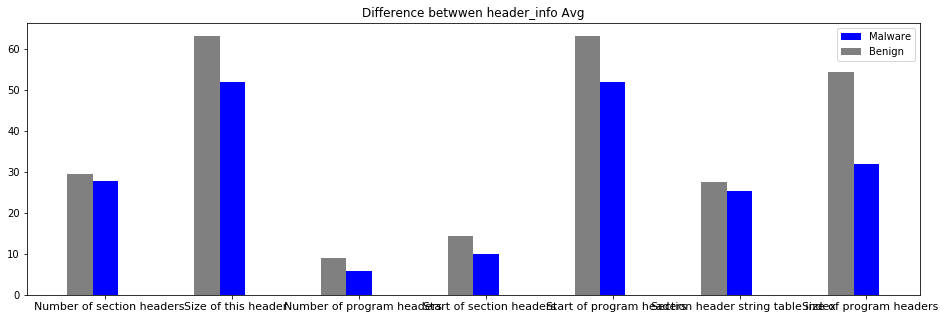

In [110]:
import numpy as np
import matplotlib.pyplot as plt


bars1 = head_mal
bars2 = head_benign

X = np.arange(len(bars1))
ax = plt.subplot(111)

ax.bar(X, bars1.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, bars2.values(), width=0.2, color='Grey', align='center')
ax.legend(('Malware','Benign'))
plt.xticks(X,bars1.keys(),fontsize=11)
plt.title("Difference betwwen header_info Avg")
plt.rcParams["figure.figsize"] = [16,35]
plt.show()

In [22]:
df0=pd.DataFrame.from_records(programm_header_info_0).fillna(0)
df1=pd.DataFrame.from_records(programm_header_info_1).fillna(0)

print df1

      DYNAMIC  INTERP  LOAD  NOTE  PHDR
0         1.0     1.0     1   1.0   1.0
1         1.0     1.0     1   1.0   1.0
2         0.0     0.0     1   0.0   0.0
3         0.0     0.0     1   0.0   0.0
4         1.0     1.0     1   1.0   1.0
5         1.0     1.0     1   1.0   1.0
6         1.0     1.0     1   1.0   1.0
7         1.0     1.0     1   1.0   1.0
8         1.0     1.0     1   1.0   1.0
9         1.0     1.0     1   1.0   1.0
10        1.0     1.0     1   1.0   1.0
11        0.0     0.0     1   0.0   0.0
12        0.0     0.0     1   0.0   0.0
13        1.0     1.0     1   1.0   1.0
14        1.0     1.0     1   1.0   1.0
15        1.0     1.0     1   1.0   1.0
16        1.0     1.0     1   1.0   1.0
17        1.0     1.0     1   1.0   1.0
18        1.0     1.0     1   1.0   1.0
19        1.0     1.0     1   1.0   1.0
20        1.0     1.0     1   1.0   1.0
21        1.0     1.0     1   1.0   1.0
22        1.0     1.0     1   1.0   1.0
23        1.0     1.0     1   1.0   1.0


In [23]:
head_benign={}
print df0.sum()
print df1.sum()
prog_head_benign=dict( df0.sum())
prog_head_mal=dict( df1.sum())
print prog_head_benign
print prog_head_mal



DYNAMIC    1465.0
INTERP     1465.0
LOAD       1499.0
NOTE       1486.0
PHDR       1465.0
dtype: float64
DYNAMIC    1312.0
INTERP     1312.0
LOAD       1499.0
NOTE       1305.0
PHDR       1312.0
dtype: float64
{'LOAD': 1499.0, 'INTERP': 1465.0, 'PHDR': 1465.0, 'DYNAMIC': 1465.0, 'NOTE': 1486.0}
{'LOAD': 1499.0, 'INTERP': 1312.0, 'PHDR': 1312.0, 'DYNAMIC': 1312.0, 'NOTE': 1305.0}


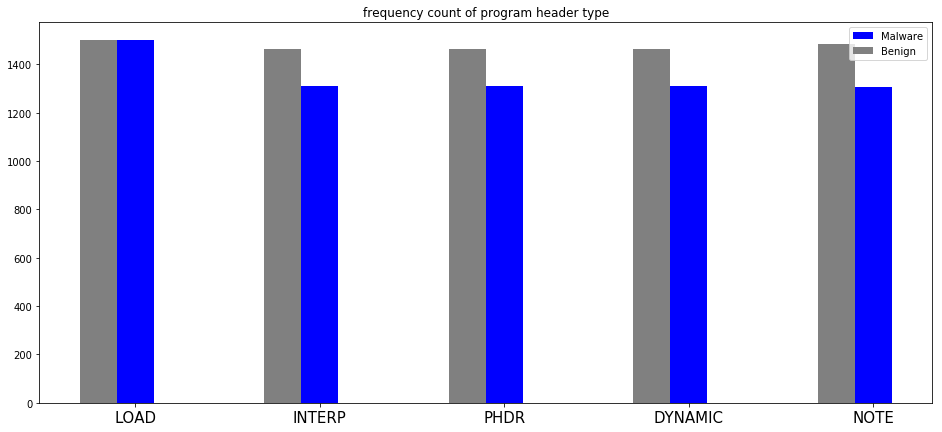

In [24]:
import numpy as np
import matplotlib.pyplot as plt


bars1 = prog_head_mal
bars2 = prog_head_benign

X = np.arange(len(bars1))
ax = plt.subplot(111)

ax.bar(X, bars1.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, bars2.values(), width=0.2, color='Grey', align='center')
ax.legend(('Malware','Benign'))
plt.xticks(X,bars1.keys(),fontsize=15)
plt.title("frequency count of program header type")
plt.rcParams["figure.figsize"] = [13,9]
plt.show()

In [16]:
df0=pd.DataFrame.from_records(section_header_info_0).fillna(0)
df1=pd.DataFrame.from_records(section_header_info_1).fillna(0)
#df=pd.DataFrame.from_records(section_header_info).fillna(0)
print df0.sum()
print df1.sum()
#print df

.               1.0
.bss         1484.0
.comment      767.0
.data        1482.0
.dynamic     1464.0
.fini        1463.0
.got         1483.0
.got.plt     1455.0
.init        1463.0
.note           5.0
.plt         1463.0
.rel.dyn        4.0
.rel.plt       48.0
.rodata      1472.0
.sbss           3.0
.shstrtab    1484.0
.strtab       740.0
.symtab       740.0
.text        1463.0
data            1.0
text            1.0
dtype: float64
.bss         1387.0
.comment     1290.0
.data        1321.0
.dynamic     1267.0
.dynstr        13.0
.fini        1267.0
.got         1386.0
.got.plt      134.0
.init        1224.0
.note         893.0
.plt         1224.0
.rel.dyn        7.0
.rel.plt      488.0
.rodata      1267.0
.sbss         326.0
.shstrtab    1401.0
.strtab      1067.0
.symtab      1067.0
.text        1267.0
ini             1.0
nit             1.0
dtype: float64


In [18]:
head_benign={}
print df0.sum()
print df1.sum()
sec_head_benig=dict( df0.sum())

sec_head_mal=dict( df1.sum())
sec_head_benign={}
for key in sec_head_mal.keys():
    if key in sec_head_benig.keys():
        sec_head_benign[key]=sec_head_benig[key]
    else:
        sec_head_benign[key]=0
      
print sec_head_benign
print sec_head_mal

.               1.0
.bss         1484.0
.comment      767.0
.data        1482.0
.dynamic     1464.0
.fini        1463.0
.got         1483.0
.got.plt     1455.0
.init        1463.0
.note           5.0
.plt         1463.0
.rel.dyn        4.0
.rel.plt       48.0
.rodata      1472.0
.sbss           3.0
.shstrtab    1484.0
.strtab       740.0
.symtab       740.0
.text        1463.0
data            1.0
text            1.0
dtype: float64
.bss         1387.0
.comment     1290.0
.data        1321.0
.dynamic     1267.0
.dynstr        13.0
.fini        1267.0
.got         1386.0
.got.plt      134.0
.init        1224.0
.note         893.0
.plt         1224.0
.rel.dyn        7.0
.rel.plt      488.0
.rodata      1267.0
.sbss         326.0
.shstrtab    1401.0
.strtab      1067.0
.symtab      1067.0
.text        1267.0
ini             1.0
nit             1.0
dtype: float64
{'.rel.dyn': 4.0, '.rodata': 1472.0, '.data': 1482.0, '.comment': 767.0, '.text': 1463.0, '.got': 1483.0, '.bss': 1484.0, '.fini':

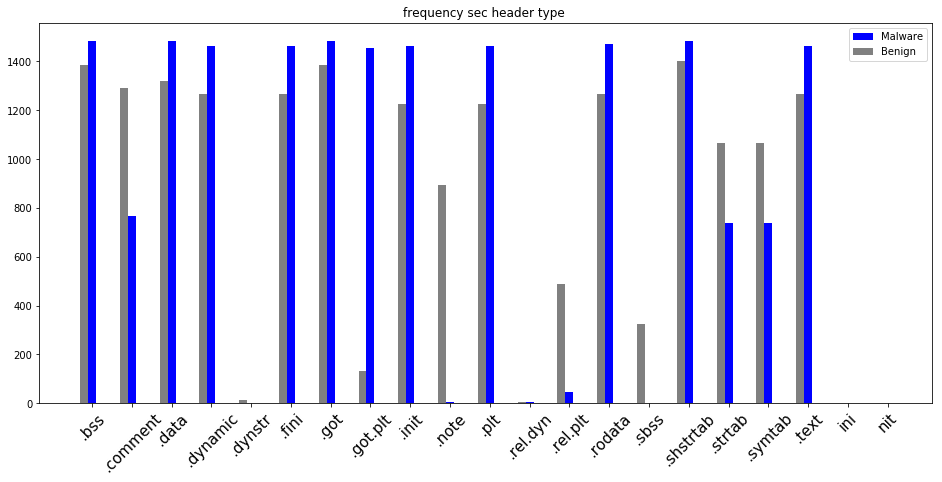

'\nname=sorted(sec_head_mal)\nX = np.arange(len(bars1))\nax = plt.subplot(111)\n\nax.bar(X, bars2, width=0.2, color=\'b\', align=\'center\')\nax.bar(X-0.2,bars1 , width=0.2, color=\'Grey\', align=\'center\')\nax.legend((\'Malware\',\'Benign\'))\nplt.xticks(name)\nplt.title("frequency section header")\nplt.rcParams["figure.figsize"] = [20,9]\nplt.show()\n'

In [21]:
import numpy as np
import matplotlib.pyplot as plt
bars1=[]
bars2=[]
for keys in sorted(sec_head_mal):
    bars1.append(sec_head_mal[keys])
    bars2.append(sec_head_benign[keys])
X = np.arange(len(bars1))
ax = plt.subplot(111)

ax.bar(X, bars2, width=0.2, color='b', align='center')
ax.bar(X-0.2, bars1, width=0.2, color='Grey', align='center')
ax.legend(('Malware','Benign'))
plt.xticks(X,sorted(sec_head_mal),fontsize=15)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.title("frequency sec header type ")
plt.rcParams["figure.figsize"] = [16,7]
plt.show()
'''
name=sorted(sec_head_mal)
X = np.arange(len(bars1))
ax = plt.subplot(111)

ax.bar(X, bars2, width=0.2, color='b', align='center')
ax.bar(X-0.2,bars1 , width=0.2, color='Grey', align='center')
ax.legend(('Malware','Benign'))
plt.xticks(name)
plt.title("frequency section header")
plt.rcParams["figure.figsize"] = [20,9]
plt.show()
'''

In [25]:
df0=pd.DataFrame.from_records(dynamic_sec_name_0).fillna(0)
df1=pd.DataFrame.from_records(dynamic_sec_name_1).fillna(0)
#df=pd.DataFrame.from_records(section_header_info).fillna(0)
print df0.sum()
print df1.sum()
#print df

DYN                   34.0
DYNBIND_NOW           21.0
DYNCOUNT           34214.0
DYNDEBUG            1465.0
DYNFINI             1464.0
DYNFINI_ARRAY       1433.0
DYNFINI_ARRAYSZ     1433.0
DYNFLAGS_1            26.0
DYNHASH               29.0
DYNINIT             1464.0
DYNINIT_ARRAY       1434.0
DYNINIT_ARRAYSZ     1434.0
DYNJMPREL           1458.0
DYNNEEDED           1465.0
DYNNULL             1465.0
DYNPLTGOT           1465.0
DYNPLTREL           1458.0
DYNPLTRELSZ         1458.0
DYNREL                58.0
DYNRELA             1406.0
DYNRELAENT          1406.0
DYNRELASZ           1406.0
DYNRELCOUNT            8.0
DYNRELENT             58.0
DYNRELSZ              58.0
DYNRPATH              14.0
DYNSTRSZ            1465.0
DYNSTRTAB           1465.0
DYNSYMENT           1465.0
DYNSYMTAB           1465.0
DYNVERDEF              1.0
DYNVERDEFNUM           1.0
DYNVERNEED          1465.0
DYNVERNEEDNUM       1465.0
dtype: float64
DYN                187.0
DYNCOUNT         25145.0
DYNDEBUG         

In [121]:
head_benign={}
print df0.sum()
print df1.sum()
dyn_head_benig=dict( df0.sum()/2265)

dyn_head_mal=dict( df1.sum()/7717)
dyn_head_benign={}

for key in dyn_head_mal.keys():
    if key in dyn_head_benig.keys():
        dyn_head_benign[key]=dyn_head_benig[key]
    else:
        dyn_head_benign[key]=0
        
dyn_head_benign['DYNCOUNT']= dyn_head_benign['DYNCOUNT']
dyn_head_mal['DYNCOUNT']= dyn_head_mal['DYNCOUNT']
dyn_head_all={}
for key in dyn_head_mal.keys():
    dyn_head_all[key]=abs(dyn_head_benign[key]-dyn_head_mal[key])
    


listk= sorted(dyn_head_all.items(), key=lambda x: x[1])
print listk
count=len(listk)
name=[]
for i in range(1,25):
     name.append(listk[count-1][0])
     count=count-1
print name

dyn_name_benign={}
dyn_name_mal={}
for key in name:
    dyn_name_benign[key]=dyn_head_benign[key]
    dyn_name_mal[key]=dyn_head_mal[key]
print dyn_name_benign
print dyn_name_mal

DYN                   34.0
DYNBIND_NOW           21.0
DYNCOUNT           34214.0
DYNDEBUG            1465.0
DYNFINI             1464.0
DYNFINI_ARRAY       1433.0
DYNFINI_ARRAYSZ     1433.0
DYNFLAGS_1            26.0
DYNHASH               29.0
DYNINIT             1464.0
DYNINIT_ARRAY       1434.0
DYNINIT_ARRAYSZ     1434.0
DYNJMPREL           1458.0
DYNNEEDED           1465.0
DYNNULL             1465.0
DYNPLTGOT           1465.0
DYNPLTREL           1458.0
DYNPLTRELSZ         1458.0
DYNREL                58.0
DYNRELA             1406.0
DYNRELAENT          1406.0
DYNRELASZ           1406.0
DYNRELCOUNT            8.0
DYNRELENT             58.0
DYNRELSZ              58.0
DYNRPATH              14.0
DYNSTRSZ            1465.0
DYNSTRTAB           1465.0
DYNSYMENT           1465.0
DYNSYMTAB           1465.0
DYNVERDEF              1.0
DYNVERDEFNUM           1.0
DYNVERNEED          1465.0
DYNVERNEEDNUM       1465.0
dtype: float64
DYN                187.0
DYNCOUNT         25145.0
DYNDEBUG         

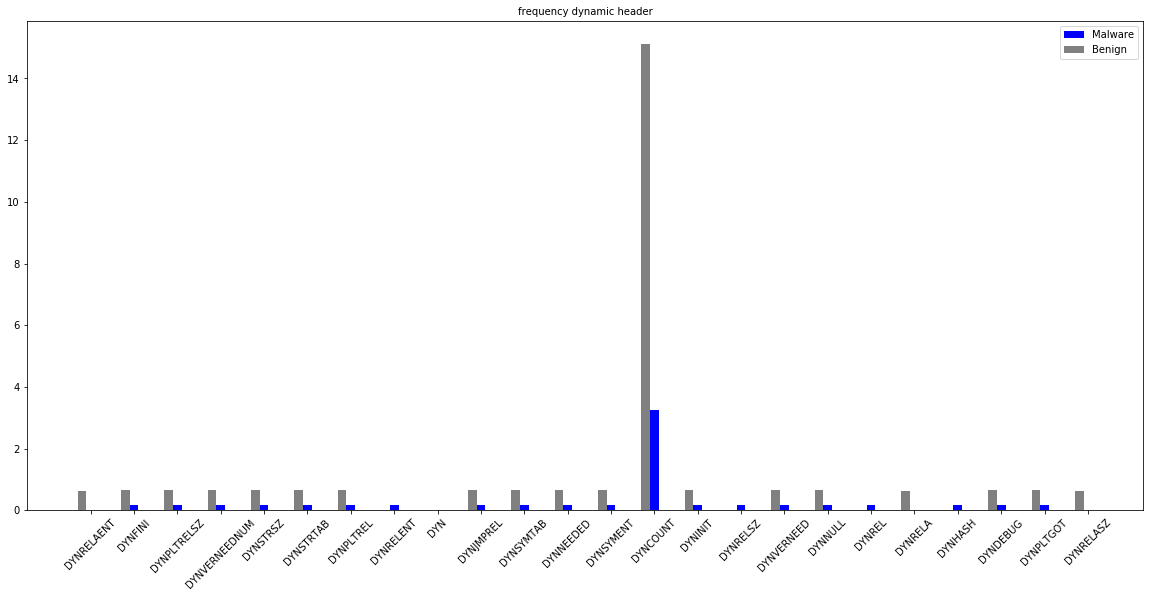

In [122]:
import numpy as np
import matplotlib.pyplot as plt


bars1 = dyn_name_mal
bars2 = dyn_name_benign

X = np.arange(len(bars1))
ax = plt.subplot(111)

ax.bar(X, bars1.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, bars2.values(), width=0.2, color='Grey', align='center')
ax.legend(('Malware','Benign'))
plt.xticks(X,bars1.keys())
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.title("frequency dynamic header",fontsize=10)
plt.rcParams["figure.figsize"] = [16,5]
plt.show()

In [26]:

df0=pd.DataFrame.from_records(dynamic_stype_0).fillna(0)
df1=pd.DataFrame.from_records(dynamic_stype_1).fillna(0)

print df0.sum()
print df1.sum()

STB_GLOBAL                 1464.0
STB_LOCAL                  1464.0
STB_WEAK                   1463.0
STT_FUNC                   1464.0
STT_FUNC_STB_GLOBAL        1464.0
STT_FUNC_STB_WEAK            48.0
STT_NOTYPE                 1464.0
STT_NOTYPE_STB_GLOBAL       485.0
STT_NOTYPE_STB_LOCAL       1464.0
STT_NOTYPE_STB_WEAK        1463.0
STT_OBJECT                  828.0
STT_OBJECT_STB_GLOBAL       828.0
STT_OBJECT_STB_WEAK         207.0
STT_TLS                      12.0
STT_TLS_STB_GLOBAL           12.0
dynamic_s_c              321635.0
toatl_s_c                120883.0
dtype: float64
STB_GLOBAL                 1267.0
STB_LOCAL                  1267.0
STB_WEAK                   1267.0
STT_FUNC                   1267.0
STT_FUNC_STB_GLOBAL        1267.0
STT_FUNC_STB_WEAK           884.0
STT_NOTYPE                 1267.0
STT_NOTYPE_STB_GLOBAL        68.0
STT_NOTYPE_STB_LOCAL       1267.0
STT_NOTYPE_STB_WEAK        1267.0
STT_OBJECT                 1265.0
STT_OBJECT_STB_GLOBAL      1265.0

In [27]:
head_benign={}
print df0.sum()
print df1.sum()
dyns_head_benign=dict( df0.sum())

dyns_head_ma=dict( df1.sum())
dyns_head_mal={}
for key in dyns_head_ma.keys():
    dyns_head_mal[key]=dyns_head_ma[key]
dyns_head_benign['dynamic_s_c']= dyns_head_benign['dynamic_s_c']/1500
dyns_head_mal['dynamic_s_c']= dyns_head_mal['dynamic_s_c']/1500
dyns_head_benign['toatl_s_c']= dyns_head_benign['toatl_s_c']/1500
dyns_head_mal['toatl_s_c']= dyns_head_mal['toatl_s_c']/1500

dyns_head_mal['STT_TLS']=0
dyns_head_mal['STT_TLS_STB_GLOBAL']=0
print dyns_head_benign
print dyns_head_mal

STB_GLOBAL                 1464.0
STB_LOCAL                  1464.0
STB_WEAK                   1463.0
STT_FUNC                   1464.0
STT_FUNC_STB_GLOBAL        1464.0
STT_FUNC_STB_WEAK            48.0
STT_NOTYPE                 1464.0
STT_NOTYPE_STB_GLOBAL       485.0
STT_NOTYPE_STB_LOCAL       1464.0
STT_NOTYPE_STB_WEAK        1463.0
STT_OBJECT                  828.0
STT_OBJECT_STB_GLOBAL       828.0
STT_OBJECT_STB_WEAK         207.0
STT_TLS                      12.0
STT_TLS_STB_GLOBAL           12.0
dynamic_s_c              321635.0
toatl_s_c                120883.0
dtype: float64
STB_GLOBAL                 1267.0
STB_LOCAL                  1267.0
STB_WEAK                   1267.0
STT_FUNC                   1267.0
STT_FUNC_STB_GLOBAL        1267.0
STT_FUNC_STB_WEAK           884.0
STT_NOTYPE                 1267.0
STT_NOTYPE_STB_GLOBAL        68.0
STT_NOTYPE_STB_LOCAL       1267.0
STT_NOTYPE_STB_WEAK        1267.0
STT_OBJECT                 1265.0
STT_OBJECT_STB_GLOBAL      1265.0

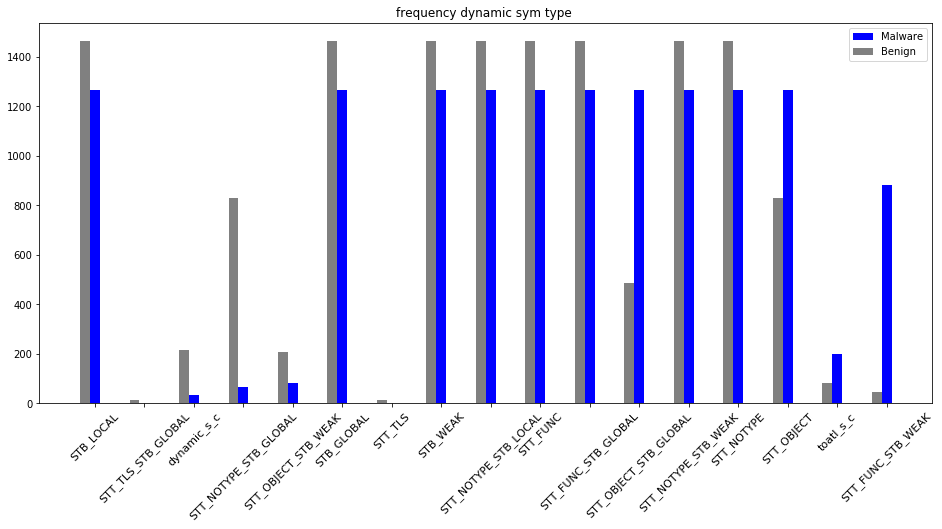

In [30]:
import numpy as np
import matplotlib.pyplot as plt


bars1 = dyns_head_mal
bars2 = dyns_head_benign

X = np.arange(len(bars1))
ax = plt.subplot(111)

ax.bar(X, bars1.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, bars2.values(), width=0.2, color='Grey', align='center')
ax.legend(('Malware','Benign'))
plt.xticks(X,bars1.keys(),fontsize=11)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.title("frequency dynamic sym type ")
plt.rcParams["figure.figsize"] = [16,7]
plt.show()

In [31]:
df0=pd.DataFrame.from_records(section_htype_0).fillna(0)
df1=pd.DataFrame.from_records(section_htype_1).fillna(0)

print df0.shape
print df1.shape
print df0.sum()
print df1.sum()

(1499, 9)
(1499, 10)
DYNAMIC     1464.0
NOBITS      1484.0
NOTE          21.0
NULL        1487.0
PROGBITS    1484.0
REL           48.0
RELA        1399.0
STRTAB      1484.0
SYMTAB       740.0
dtype: float64
DYNAMIC     1269.0
HASH           1.0
NOBITS      1378.0
NOTE         939.0
NULL        1451.0
PROGBITS    1405.0
REL          490.0
RELA          11.0
STRTAB      1405.0
SYMTAB      1076.0
dtype: float64


In [33]:


section_head_benig=dict( df0.sum())

section_head_mal=dict( df1.sum())
section_head_benign=section_head_benig.copy()
'''
for key in section_head_mal.keys():
    if key in section_head_benig.keys():
        section_head_benign[key]=section_head_benig[key]
    else:
        section_head_benign[key]=0
'''
section_head_benign['HASH']=0
print  section_head_benign
print section_head_mal

{'PROGBITS': 1484.0, 'DYNAMIC': 1464.0, 'SYMTAB': 740.0, 'NOBITS': 1484.0, 'NOTE': 21.0, 'REL': 48.0, 'HASH': 0, 'STRTAB': 1484.0, 'RELA': 1399.0, 'NULL': 1487.0}
{'STRTAB': 1405.0, 'HASH': 1.0, 'SYMTAB': 1076.0, 'DYNAMIC': 1269.0, 'NOBITS': 1378.0, 'NOTE': 939.0, 'REL': 490.0, 'PROGBITS': 1405.0, 'RELA': 11.0, 'NULL': 1451.0}


1464.0
0
1484.0
21.0
1487.0
1484.0
48.0
1399.0
1484.0
740.0
[1269.0, 1.0, 1378.0, 939.0, 1451.0, 1405.0, 490.0, 11.0, 1405.0, 1076.0]
[1464.0, 0, 1484.0, 21.0, 1487.0, 1484.0, 48.0, 1399.0, 1484.0, 740.0]


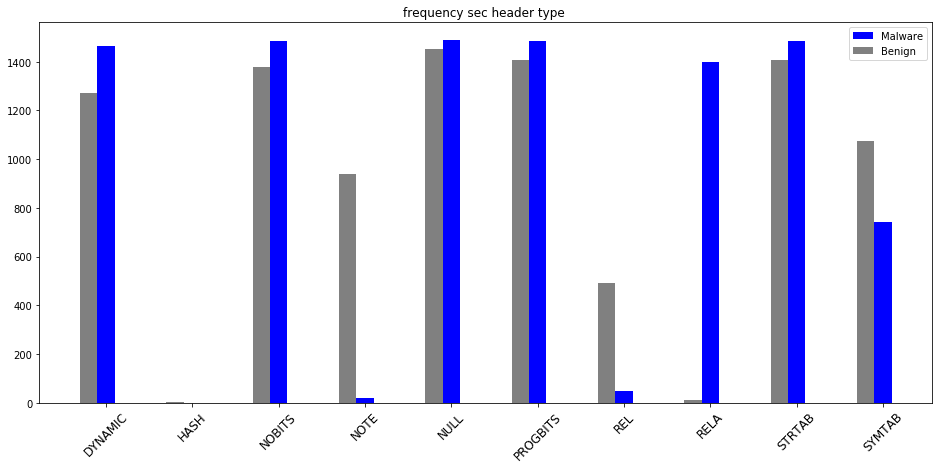

In [34]:
bars1=[]
bars2=[]
for keys in sorted(section_head_mal):
    bars1.append(section_head_mal[keys])
    print section_head_benign[keys]
    bars2.append(section_head_benign[keys])
#bars1 = sorted(section_head_mal)

#bars2 =  sorted(section_head_benign)
print bars1
print bars2

X = np.arange(len(bars1))
ax = plt.subplot(111)

ax.bar(X, bars2, width=0.2, color='b', align='center')
ax.bar(X-0.2, bars1, width=0.2, color='Grey', align='center')
ax.legend(('Malware','Benign'))
plt.xticks(X,sorted(section_head_mal),fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.title("frequency sec header type ")
plt.rcParams["figure.figsize"] = [12,8]
plt.show()